In [78]:
import pandas as pd
import numpy as np
import os
from textblob import TextBlob
import nltk 
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [65]:
# nltk.download('vader_lexicon')

In [79]:
df = pd.read_csv('lyrics.csv', index_col='index')

In [45]:
df.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [80]:
df = df[df.lyrics.notnull()]
df = df[(df.genre!='Not Available') & (df.genre!= 'Other')]
df = df[df.year >= 2010]

In [42]:
df.groupby(['year', 'genre']).lyrics.count().unstack()

genre,Country,Electronic,Folk,Hip-Hop,Indie,Jazz,Metal,Pop,R&B,Rock
year,,,,,,,,,,
2010,360,439,106,1537,159,306,655,1798,51,3421
2011,287,431,57,1474,240,228,613,2259,85,2995
2012,301,385,190,1778,223,346,594,1939,71,3170
2013,522,538,111,1229,240,393,566,1978,163,2671
2014,535,660,96,1324,380,698,583,2611,208,3697
2015,406,478,77,1161,331,420,431,1999,273,2371
2016,414,506,102,1508,260,585,497,1839,223,2624


In [76]:
def get_text_blob_metrics(lyrics):
    blob = TextBlob(lyrics)
    
    pol = []
    subj = []
    
    for sentence in blob.sentences:
        pol.append(sentence.sentiment.polarity)
        subj.append(sentence.sentiment.subjectivity)
        
    polarity_mean = np.mean(pol)
    polarity_std = np.std(pol)
    
    subjectivity_mean = np.mean(subj)
    subjectivity_std = np.std(subj)
    
    return pd.Series((polarity_mean, polarity_std, subjectivity_mean, subjectivity_std))

In [81]:
df[['polarity_avg', 'polarity_std', 'subjectivity_avg', 'subjectivity_std']] = df.apply(lambda row: get_text_blob_metrics(row.lyrics), axis=1)

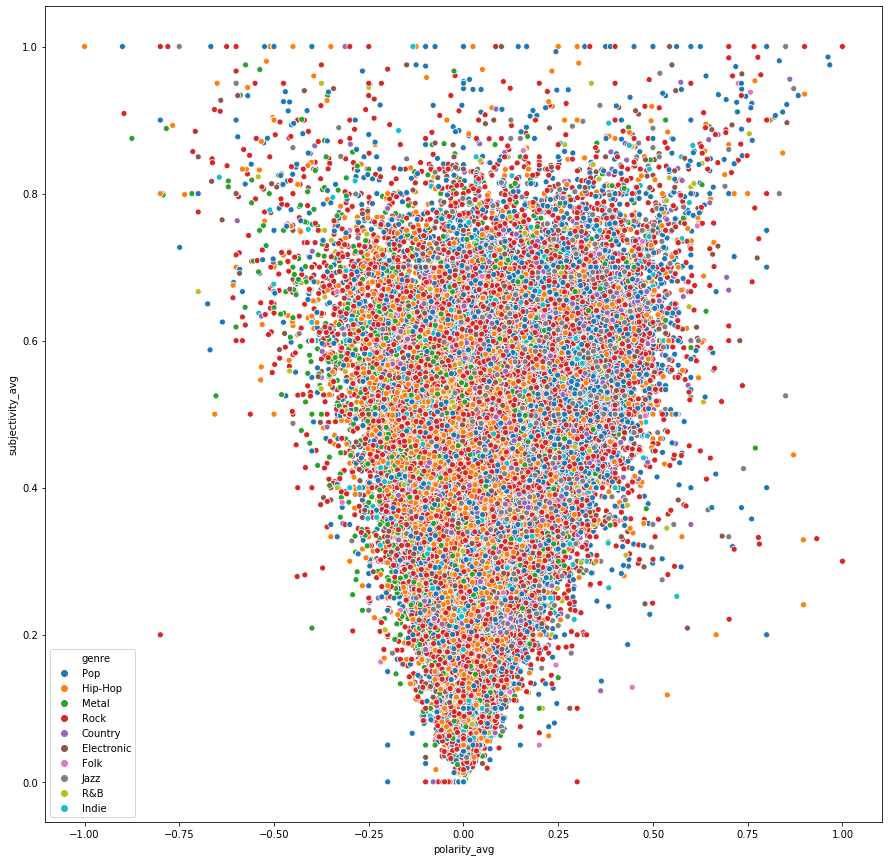

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x='polarity_avg', y='subjectivity_avg', hue='genre')
plt.savefig('map_songs.png')
plt.show()

In [103]:
df.to_csv('lyrics_sentiment.csv')